ML PROBLEM STATEMENT:

- The problem can be concieved as a machine learning problem where we want to form a clusters of hotels with similar functionality

EXPLORATION AND PREPROCESSING INVOLVED:

- The training dataset contains 7504 rows and 15 columns
- The test dataset contains 2469 and 15 columns

# IMPORT LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

READIND EXISTING AND NEW HOTELS DATA AS TRAIN AND TEST 

In [5]:
train = pd.read_csv('ExistingHotels_CustomerVisitsdata-1554810038262.csv')

In [6]:
test = pd.read_csv('NewHotels_CutstomerVisitsdata-1554810098964.csv')

# DATA EXPLORATION 

In [4]:
train.head(2)

,Hotelid,userid,reviewtext,Date,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,hotel_101,hotel_2225,Just An Average stay This was just an average ...,"Dec 13, 2008",0,0,4,4,1,4,4,4,3,3.5,$245
1,hotel_101,hotel_5079,go elsewhere The place is hugely overpriced an...,"Dec 2, 2008",0,0,2,4,3,3,1,2,2,3.5,$245


In [5]:
test.head(2)

,Hotelid,userid,reviewtext,Date,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,hotel_104,hotel_4342,Awesome Everything about this resort was great...,"Jan 5, 2009",0,0,6,6,6,6,6,6,6,4.0,$227
1,hotel_104,hotel_2024,Convenient When I say Above Average I'm compa...,"Nov 10, 2008",0,0,4,4,6,5,4,5,1,4.0,$227


In [7]:
print('The number of rows and columns are: {}'.format(train.shape))

The number of rows and columns are: (7504, 15)


In [8]:
print('The number of rows and columns are: {}'.format(test.shape))

The number of rows and columns are: (2469, 15)


In [6]:
print('Null values in the train dataset\n')
print(test.isna().sum())

Null values in the train dataset

Hotelid                        0
userid                         0
reviewtext                     0
Date                           0
NoOfReaders                    0
HelpfulToNoOfreaders           0
Value_rating                   0
Rooms_rating                   0
Location_rating                0
Cleanliness_rating             0
Checkin_rating                 0
Service_rating                 0
Businessservice_rating         0
AverageOverallRatingOfHotel    0
AveragePricing                 0
dtype: int64


In [7]:
print('Null values in the test dataset\n')
print(test.isna().sum())

Null values in the test dataset

Hotelid                        0
userid                         0
reviewtext                     0
Date                           0
NoOfReaders                    0
HelpfulToNoOfreaders           0
Value_rating                   0
Rooms_rating                   0
Location_rating                0
Cleanliness_rating             0
Checkin_rating                 0
Service_rating                 0
Businessservice_rating         0
AverageOverallRatingOfHotel    0
AveragePricing                 0
dtype: int64


In [8]:
print('Train dataset has {} duplicated values'.format(train.duplicated().sum()))

Train dataset has 0 duplicated values


In [9]:
print('Test dataset has {} duplicated values'.format(test.duplicated().sum()))

Test dataset has 0 duplicated values


In [10]:
#DROPPING COLOUMNS FROM THE TRAIN AND TEST DATA AS THEY WOULDN'T USED IN FURTHER PROCESS
#FOR CLUSTERING ONLY NUMERICAL DATA IS REQUIRED

train.drop(labels=['Hotelid','userid','reviewtext','Date'],axis=1,inplace=True)

In [11]:
test.drop(labels=['Hotelid','userid','reviewtext','Date'],axis=1,inplace=True)

In [12]:
train.head(4)

,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,0,0,4,4,1,4,4,4,3,3.5,$245
1,0,0,2,4,3,3,1,2,2,3.5,$245
2,0,0,2,4,3,4,2,3,1,3.5,$245
3,0,0,5,5,6,6,5,5,3,3.5,$245


In [13]:
test.head(4)

,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,0,0,6,6,6,6,6,6,6,4.0,$227
1,0,0,4,4,6,5,4,5,1,4.0,$227
2,0,0,3,4,4,5,6,4,4,4.0,$227
3,0,0,6,6,6,6,6,6,6,4.0,$227


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7504 entries, 0 to 7503
Data columns (total 11 columns):
NoOfReaders                    7504 non-null int64
HelpfulToNoOfreaders           7504 non-null int64
Value_rating                   7504 non-null int64
Rooms_rating                   7504 non-null int64
Location_rating                7504 non-null int64
Cleanliness_rating             7504 non-null int64
Checkin_rating                 7504 non-null int64
Service_rating                 7504 non-null int64
Businessservice_rating         7504 non-null int64
AverageOverallRatingOfHotel    7504 non-null float64
AveragePricing                 7504 non-null object
dtypes: float64(1), int64(9), object(1)
memory usage: 645.0+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 11 columns):
NoOfReaders                    2469 non-null int64
HelpfulToNoOfreaders           2469 non-null int64
Value_rating                   2469 non-null int64
Rooms_rating                   2469 non-null int64
Location_rating                2469 non-null int64
Cleanliness_rating             2469 non-null int64
Checkin_rating                 2469 non-null int64
Service_rating                 2469 non-null int64
Businessservice_rating         2469 non-null int64
AverageOverallRatingOfHotel    2469 non-null float64
AveragePricing                 2469 non-null object
dtypes: float64(1), int64(9), object(1)
memory usage: 212.3+ KB


In [16]:
#SPLITING THE COLOUMN AVERAGE PRICING TO REMOVE '$

train['AveragePricing'] = train.AveragePricing.apply(lambda x: x.split('$')[1])

In [17]:
train['AveragePricing'] = train.AveragePricing.astype('int64')

In [18]:
#SPLITING THE COLOUMN AVERAGE PRICING TO REMOVE '$

test['AveragePricing'] = test.AveragePricing.apply(lambda x: x.split('$')[1])

In [19]:
test['AveragePricing'] = test.AveragePricing.astype('int64')

In [20]:
train.AveragePricing.head(4)

0    245
1    245
2    245
3    245
Name: AveragePricing, dtype: int64

In [21]:
test.AveragePricing.head(4)

0    227
1    227
2    227
3    227
Name: AveragePricing, dtype: int64

SCALING DATA WITH Z-SCORE

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
scaler.fit(train['AveragePricing'].values.reshape(-1,1))

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
train['AveragePricing'] = scaler.transform(train['AveragePricing'].values.reshape(-1,1))

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
test['AveragePricing'] = scaler.transform(test['AveragePricing'].values.reshape(-1,1))

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
train.head(4)

,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,0,0,4,4,1,4,4,4,3,3.5,-0.312706
1,0,0,2,4,3,3,1,2,2,3.5,-0.312706
2,0,0,2,4,3,4,2,3,1,3.5,-0.312706
3,0,0,5,5,6,6,5,5,3,3.5,-0.312706


In [27]:
test.head(4)

,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,0,0,6,6,6,6,6,6,6,4.0,-0.514701
1,0,0,4,4,6,5,4,5,1,4.0,-0.514701
2,0,0,3,4,4,5,6,4,4,4.0,-0.514701
3,0,0,6,6,6,6,6,6,6,4.0,-0.514701


# CLUSTERING (K-MEANS)

In [28]:
from sklearn.cluster import KMeans

wss= {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(train)
    clusters = kmeans.labels_
    wss[k] = kmeans.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center
    

In [29]:
#WITHIN SUM OF SQUARES 
wss

{1: 459913.8539445629,
 2: 307324.82719294936,
 3: 213499.41746724505,
 4: 173897.22931231372,
 5: 153560.97821353958,
 6: 139298.9990604297,
 7: 124932.73801955374,
 8: 112774.62197495614,
 9: 103198.1110182577}

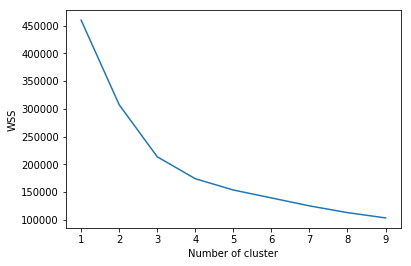

In [30]:
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.show()

In [31]:
# Number of clusters
kmeans = KMeans(n_clusters=4,random_state=148461)
# Fitting the input data
kmeans = kmeans.fit(train)
# Getting the cluster labels
labels = kmeans.predict(train)
# Centroid values
centroids = kmeans.cluster_centers_

In [32]:
centroids

array([[ 1.47847565e+00,  1.22088920e+00,  4.90402258e+00,
         4.93789697e+00,  5.24253117e+00,  5.21406728e+00,
         5.05010586e+00,  4.93436838e+00,  3.43236885e+00,
         3.75629264e+00,  1.46404589e-03],
       [ 7.67316342e+00,  6.28035982e+00,  4.25562219e+00,
         4.26161919e+00,  2.21589205e+00,  4.45652174e+00,
         2.08845577e+00,  4.22788606e+00,  1.54197901e+00,
         3.75149925e+00,  1.62553330e-01],
       [ 2.03839662e+01,  1.56329114e+01,  3.66244726e+00,
         3.67088608e+00,  1.66244726e+00,  3.81434599e+00,
         1.53586498e+00,  3.66666667e+00,  1.32489451e+00,
         3.77848101e+00,  8.32733039e-03],
       [ 2.45124851e+00,  1.78299643e+00,  1.49821641e+00,
         1.49583829e+00,  1.65457788e+00,  1.57491082e+00,
         1.43579073e+00,  1.52140309e+00,  1.24256837e+00,
         3.59096314e+00, -1.33795112e-01]])

In [33]:
labels

array([0, 3, 3, ..., 0, 0, 0])

In [34]:
test_labels = kmeans.predict(test)

In [35]:
test_labels

array([0, 0, 0, ..., 3, 0, 3])

In [36]:
#PCA ON TRAIN AND TEST DATA TO DECOMPOSE THE DATA

from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=3)

In [38]:
pca.fit(train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [39]:
train1 = pca.transform(train)

In [40]:
test1 = pca.transform(test)

In [41]:
train1.shape

(7504, 3)

In [42]:
test1.shape

(2469, 3)

# PLOTING TEST AND TRAIN CLUSTERS

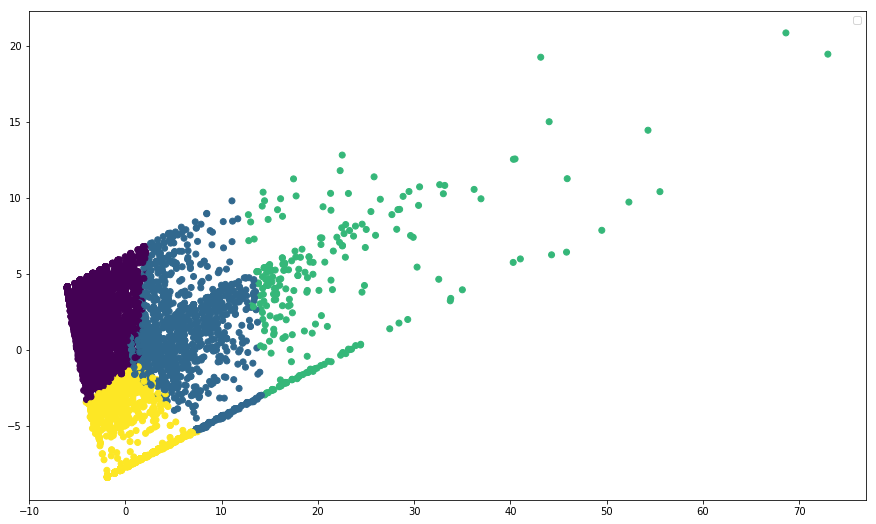

In [43]:
#TRAIN CLUSTERS

plt.figure(figsize=(15,9))
plt.legend(test_labels)
plt.scatter(train1[:, 0], train1[:, 1], c=labels)

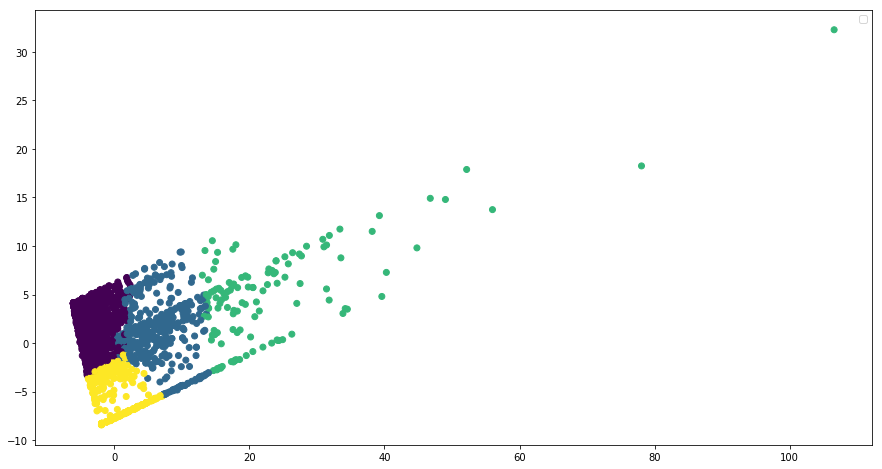

In [44]:
#TEST CLUSTERS

plt.figure(figsize=(15,8))
plt.legend(test_labels)
plt.scatter(test1[:, 0], test1[:, 1], c=test_labels)